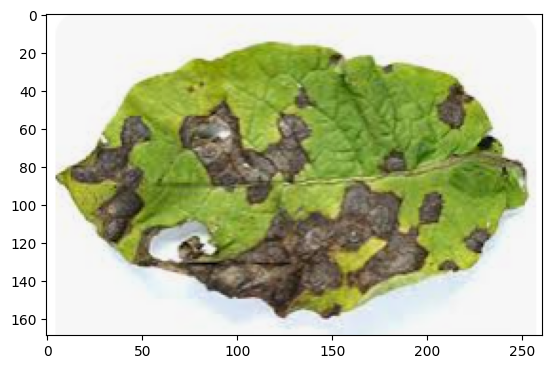

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('/content/leafimage.png')
image1 = cv2.imread('/content/carimage.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.imread('/content/leafimage.png')
plt.imshow(image)



In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


[0 1 2]
[[ 92  92  54]
 [143 163  68]
 [243 244 243]]
[ 9503 14938 19668]


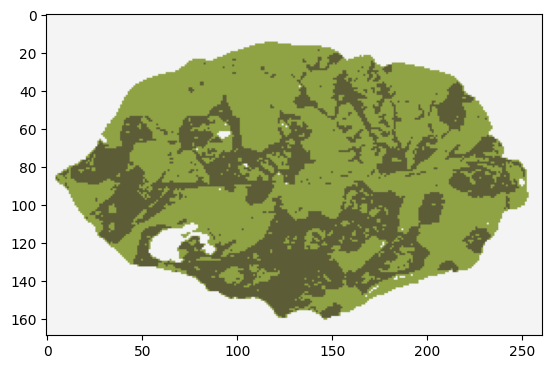

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%

#cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
#cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
#cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
#max_iter - An integer specifying maximum number of iterations.
#epsilon - Required accuracy

#criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3

#compactness, retval : It is the sum of squared distance from each point to their corresponding centers.
#labels : This is the label array (i.e. labels which denotes which pixel belongs to which cluster)
#centers : This is array of centers of clusters


# My criteria is such that, whenever 10 iterations of algorithm is ran, or an accuracy of epsilon = 1.0 is reached, stop the algorithm and return the answer.
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS
# Apply KMeans
#compactness,labels,centers = cv2.kmeans(pixel_vals,2,None,criteria,10,flags)

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(np.unique(labels))
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image1.shape))

plt.imshow(segmented_image)

from PIL import Image

cv2.imwrite('segmented_image.jpg', segmented_image)

#print(np.unique(segmented_image.reshape(-1, segmented_image.shape[2]), axis=0))
colours, counts = np.unique(segmented_image.reshape(-1, segmented_image.shape[2]), axis=0, return_counts=1)
print(colours)
print(counts)
